# Calculate Cosine Similarity Score (KSA, JD_linkdein)

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

/Users/jun/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Approach 1. use CountVectorizer

In [2]:

JD = pd.read_csv('/Users/jun/Desktop/DAEN690-008/Code/JD_linkdein.csv')


KSA = pd.read_excel('/Users/jun/Desktop/DAEN690-008/Code/KSA.xlsx')

In [3]:

def preprocess_text(text):
    # Remove punctuation and convert to lowercase
    text = re.sub(r'[^\w\s]', '', str(text).lower())
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    # Stem the words
    stemmer = PorterStemmer()
    text = ' '.join([stemmer.stem(word) for word in text.split()])
    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return text



JD['Description'] = JD['Description'].apply(preprocess_text)
KSA['KSA_Description'] = KSA['KSA_Description'].apply(preprocess_text)

In [4]:
JD['Description']

0      compani overview mcnc north carolina nonprofit...
1      compani overviewmcnc north carolina nonprofit ...
2      compani overviewmcnc north carolina nonprofit ...
3      curalinc healthcar seek talent secur analyst j...
4      curalinc healthcar seek talent secur analyst j...
                             ...                        
145    long term contract atlantaraleigh candid requi...
146    long term contract atlantaraleigh candid requi...
147    acuiti brand inc nyse ayi marketlead industri ...
148    summari posit recruit 10 usc 1599f cyber excep...
149    overviewth primari purpos posit gain experi pr...
Name: Description, Length: 150, dtype: object

In [5]:
KSA['KSA_Description']

0                                     abil analyz malwar
1      abil conduct vulner scan recogn vulner secur s...
2      abil accur complet sourc data use intellig ass...
3           abil design incid respons cloud servic model
4      abil appli cybersecur privaci principl organiz...
                             ...                        
124                          skill conduct trend analysi
125                    skill use secur event correl tool
126        skill design incid respons cloud servic model
127    skill appli cybersecur privaci principl organi...
128    skill use cyber defens servic provid report st...
Name: KSA_Description, Length: 129, dtype: object

In [6]:

KSA_string = ' '.join(KSA['KSA_Description'])


KSA_df = pd.DataFrame({'KSA': KSA_string}, index=[0])


KSA_df

,KSA
0,abil analyz malwar abil conduct vulner scan re...


In [7]:

concatenated_text = pd.concat([JD['Description'], KSA_df['KSA']], ignore_index=True)


concatenated_text

0      compani overview mcnc north carolina nonprofit...
1      compani overviewmcnc north carolina nonprofit ...
2      compani overviewmcnc north carolina nonprofit ...
3      curalinc healthcar seek talent secur analyst j...
4      curalinc healthcar seek talent secur analyst j...
                             ...                        
146    long term contract atlantaraleigh candid requi...
147    acuiti brand inc nyse ayi marketlead industri ...
148    summari posit recruit 10 usc 1599f cyber excep...
149    overviewth primari purpos posit gain experi pr...
150    abil analyz malwar abil conduct vulner scan re...
Length: 151, dtype: object

In [8]:

ctvectorizer = CountVectorizer()


ct_matrix = ctvectorizer.fit_transform(concatenated_text)


ct_matrix

<151x2576 sparse matrix of type '<class 'numpy.int64'>'
	with 37210 stored elements in Compressed Sparse Row format>

In [9]:

cosine_ct = cosine_similarity(ct_matrix[:-1], ct_matrix[-1])


JD['cos_KSA_countvect'] = cosine_ct[:,0]

In [10]:

JD['cos_KSA_countvect']

0      0.281426
1      0.289113
2      0.275114
3      0.286015
4      0.286015
         ...   
145    0.141630
146    0.141630
147    0.152354
148    0.217248
149    0.268306
Name: cos_KSA_countvect, Length: 150, dtype: float64

In [11]:

print(JD['cos_KSA_countvect'].describe())

count    150.000000
mean       0.262204
std        0.073018
min        0.000000
25%        0.227849
50%        0.271710
75%        0.288922
max        0.413247
Name: cos_KSA_countvect, dtype: float64


## Approach 2. use TF-IDF vectorizer

In [12]:

tfvectorizer = TfidfVectorizer()


tfidf_matrix = tfvectorizer.fit_transform(concatenated_text)


cosine_tfidf = cosine_similarity(tfidf_matrix[:-1], tfidf_matrix[-1])



JD['cos_KSA_tfidf'] = cosine_tfidf[:,0]

In [13]:

JD['cos_KSA_tfidf']

0      0.123529
1      0.122810
2      0.119078
3      0.125563
4      0.125563
         ...   
145    0.040293
146    0.040293
147    0.063109
148    0.118748
149    0.163157
Name: cos_KSA_tfidf, Length: 150, dtype: float64

In [14]:

print(JD['cos_KSA_tfidf'].describe())

count    150.000000
mean       0.141081
std        0.051472
min        0.000000
25%        0.124463
50%        0.129393
75%        0.161756
max        0.265179
Name: cos_KSA_tfidf, dtype: float64


In [15]:

JD.to_csv('JDlinkdein_cosine_KSA.csv', index=False)

In [17]:

JD_cs_ksa = pd.read_csv('/Users/jun/Downloads/JDlinkdein_cosine_KSA.csv')

In [18]:
JD_cs_ksa

,Date,Company,Title,Location,Description,Level,Type,Function,Industry,Link,cos_KSA_countvect,cos_KSA_tfidf
0,3/2/2023,MCNC,Cybersecurity Analyst,"Durham, NC",compani overview mcnc north carolina nonprofit...,Mid-Senior level,Full-time,Information Technology,IT Services and IT Consulting,https://www.linkedin.com/jobs/view/cybersecuri...,0.281426,0.123529
1,3/8/2023,MCNC,Associate Cybersecurity Analyst,"Durham, NC",compani overviewmcnc north carolina nonprofit ...,Mid-Senior level,Full-time,Information Technology,IT Services and IT Consulting ...,https://www.linkedin.com/jobs/view/associate-c...,0.289113,0.122810
2,2/23/2023,CuraLinc Healthcare,Security Analyst,United States,compani overviewmcnc north carolina nonprofit ...,Mid-Senior level,Full-time,Information Technology,IT Services and IT Consulting ...,https://www.linkedin.com/jobs/view/security-an...,0.275114,0.119078
3,3/18/2023,VForce Infotech,Cyber Security Analyst,"Edison, NJ",curalinc healthcar seek talent secur analyst j...,Mid-Senior level,Full-time,Information Technology,Wellness and Fitness Services ...,https://www.linkedin.com/jobs/view/cyber-secur...,0.286015,0.125563
4,3/20/2023,Irvine Technology Corporation,Security Operations Center Analyst,"Houston, TX",curalinc healthcar seek talent secur analyst j...,Mid-Senior level,Full-time,Information Technology,Wellness and Fitness Services ...,https://www.linkedin.com/jobs/view/security-op...,0.286015,0.125563
...,...,...,...,...,...,...,...,...,...,...,...,...
145,2/22/2023,Qualis Corporation,Cyber Security Analyst,"Albuquerque, NM",long term contract atlantaraleigh candid requi...,Mid-Senior level,Contract,"Information Technology, Engineeri...",Banking and Financial Services ...,https://www.linkedin.com/jobs/view/cyber-secur...,0.141630,0.040293
146,3/15/2023,Acuity Brands,Cybersecurity Intern,"Conyers, GA",long term contract atlantaraleigh candid requi...,Mid-Senior level,Contract,"Information Technology, Engineeri...",Banking and Financial Services ...,https://www.linkedin.com/jobs/view/cybersecuri...,0.141630,0.040293
147,3/20/2023,Defense Information Systems Agency,IT SPECIALIST (NETWORK),"Scott AFB, IL",acuiti brand inc nyse ayi marketlead industri ...,Internship,Internship,Information Technology,Electric Lighting Equipment Manufac...,https://www.linkedin.com/jobs/view/it-speciali...,0.152354,0.063109
148,10/8/2022,Center for Internet Security,Cyber Incident Response Team Intern - Remote,United States,summari posit recruit 10 usc 1599f cyber excep...,NaN,Internship,Other,Computer and Network Security,https://www.linkedin.com/jobs/view/cyber-incid...,0.217248,0.118748


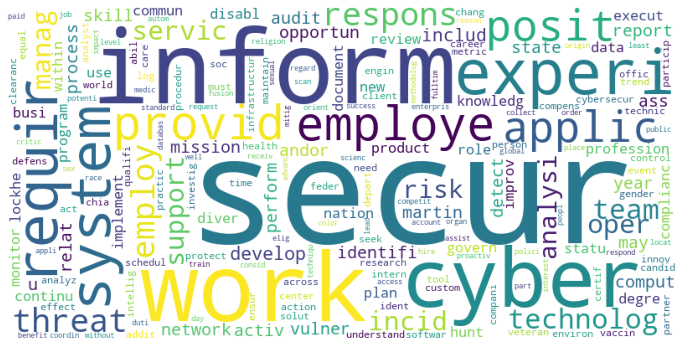

In [19]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# concatenate all the JDlinkedin
JD_lkdi = ' '.join(concatenated_text[:149])

# Load stop words
stop_words = set(stopwords.words('english'))

# tokenize and remove stop words
lkdi_tokens = [word for word in word_tokenize(JD_lkdi.lower()) if word.isalpha() and word not in stopwords.words('english')]

# get the frequency distribution
fdist = FreqDist(lkdi_tokens)

# generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(fdist)

# plot the word cloud
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


# Word Cloud for Job Descriptions from Linkedin